In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math
import time

In [2]:
def create_graph():
    G=nx.Graph()    
    G.add_nodes_from(range(1,101))
    return G

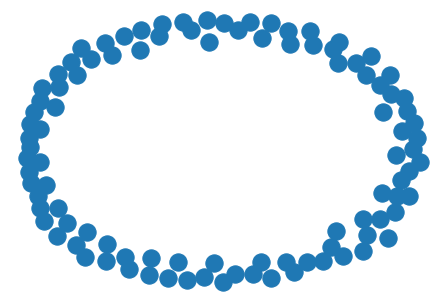

In [3]:
plt.show()
nx.draw(G)

In [4]:
def assign_bmi(G):
    for each in G.nodes():
        G.nodes[each]['name']=random.randint(15,40)
        G.nodes[each]['type']='person'

In [5]:
def visualize(G,t):
    time.sleep(1)
    labeldict=get_labels(G)
    nodesize=get_size(G)
    color=get_colors(G)
    nx.draw(G,labels=labeldict,node_size=nodesize,node_color=color)
    plt.savefig('evolution.jpg')
    plt.clf()
    plt.cla()
    nx.write_gml(G,'evolution_'+str(t)+'.gml')
    #plt.show()

In [6]:
def get_labels(G):
    dict1={}
    for each in G.nodes():
        dict1[each]=G.nodes[each]['name']
        #print(dict1[each])
    #print("labels")
    #print(dict1)
    return dict1

In [7]:
def get_size(G):
    array1=[]
    for each in G.nodes():
        if(G.nodes[each]['type']=='person'):
            array1.append(G.nodes[each]['name']*10)
        else:
            array1.append(500)
    return array1

In [8]:
def add_foci_nodes(G):
    n=G.number_of_nodes()
    i=n+1
    foci_nodes=['gym','eatout','movie_club','karate_club','yoga_club']
    for j in range(5):
        G.add_node(i)
        G.nodes[i]['name']=foci_nodes[j]
        G.nodes[i]['type']='foci'
        i+=1

In [9]:
def get_colors(G):
    c=[]
    for i in G.nodes():
        if(G.nodes[i]['type']=='person'):
            if(G.nodes[i]['name']==15):
                c.append('yellow')
            elif(G.nodes[i]['name']==40):
                c.append('green')
            else:
                c.append('blue')
        else:
            c.append('red')
    return c

In [10]:
def get_person_nodes(G):
    p=[]
    for i in G.nodes():
        if(G.nodes[i]['type']=='person'):
            p.append(i)
    return p

In [11]:
def get_foci_nodes(G):
    f=[]
    for i in G.nodes():
        if(G.nodes[i]['type']=='foci'):
            f.append(i)
    return f

In [12]:
def add_foci_edges(G):
    foci_nodes=get_foci_nodes(G)
    person_nodes=get_person_nodes(G)
    print("foci nodes")
    print(foci_nodes)
    print("person nodes")
    print(person_nodes)
    for i in person_nodes:
        r=random.choice(foci_nodes)
        G.add_edge(i,r)

In [13]:
def homophily(G):
    pnodes=get_person_nodes(G)
    for u in pnodes:
        for v in pnodes:
            if(u!=v):
                diff=abs(G.nodes[u]['name']-G.nodes[v]['name'])
                p=1/(diff+1000)
                r=random.uniform(0,1)
                if(r<p):
                    G.add_edge(u,v)

In [14]:
#common neighbours
def cmn(u,v,G):
    nu=set(G.neighbors(u))
    nv=set(G.neighbors(v))
    return(len(nu & nv))

In [15]:
def closure(G):
    array1=[]
    for u in G.nodes():
        for v in G.nodes():
            if(u!=v and G.nodes[u]['type']=='person' or G.nodes[v]['type']=='person' ):
                k=cmn(u,v,G)
                p=1-math.pow(1-0.01,k)
                tmp=[]
                tmp.append(u)
                tmp.append(v)
                tmp.append(p)
                array1.append(tmp)
    #print(array1)
    for i in array1:
        u=i[0]
        v=i[1]
        p=i[2]
        r=random.uniform(0,1)
        if r<p:
            G.add_edge(u,v)

In [16]:
def change_bmi(G):
    fnodes=get_foci_nodes(G)
    for i in fnodes:
        if(G.nodes[i]['name']=='eatout'):
            for j in G.neighbors(i):
                if(G.nodes[j]['name']!=40):
                    G.nodes[j]['name']=G.nodes[j]['name'] + 1
        if(G.nodes[i]['name']=='gym'):
            for j in G.neighbors(i):
                if(G.nodes[j]['name']!=15):
                    G.nodes[j]['name']=G.nodes[j]['name'] - 1

foci nodes
[101, 102, 103, 104, 105]
person nodes
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


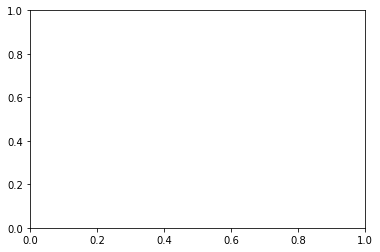

In [17]:
G = create_graph()
assign_bmi(G)
add_foci_nodes(G)#to add interest field in the nodes
add_foci_edges(G)
time.sleep(10)
visualize(G,0)
#nx.write_gml(G,'evolution_0.gml')
for t in range(1,10):    
    homophily(G)
    closure(G)
    change_bmi(G)
    visualize(G,t+1)